<a href="https://colab.research.google.com/github/AmatSaw04/Resume/blob/main/QuantEdge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:

start = '2013-01-01'
end = '2022-12-31'
df = yf.download('TSLA', start=start, end=end)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2013-01-02,2.357333,2.357333,2.363333,2.314000,2.333333,17922000
2013-01-03,2.318000,2.318000,2.363333,2.316667,2.345333,11130000
2013-01-04,2.293333,2.293333,2.320000,2.261333,2.320000,10110000
2013-01-07,2.289333,2.289333,2.320000,2.260000,2.320000,6630000
2013-01-08,2.245333,2.245333,2.300000,2.207333,2.300000,19260000


In [ ]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2022-12-23,123.150002,123.150002,128.619995,121.019997,126.370003,166989700
2022-12-27,109.099998,109.099998,119.669998,108.760002,117.500000,208643400
2022-12-28,112.709999,112.709999,116.269997,108.239998,110.349998,221070500
2022-12-29,121.820000,121.820000,123.570000,117.500000,120.389999,221923300
2022-12-30,123.180000,123.180000,124.480003,119.750000,119.949997,157777300


In [ ]:
df=df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2013-01-02,2.357333,2.357333,2.363333,2.314000,2.333333,17922000
1,2013-01-03,2.318000,2.318000,2.363333,2.316667,2.345333,11130000
2,2013-01-04,2.293333,2.293333,2.320000,2.261333,2.320000,10110000
3,2013-01-07,2.289333,2.289333,2.320000,2.260000,2.320000,6630000
4,2013-01-08,2.245333,2.245333,2.300000,2.207333,2.300000,19260000


<ipython-input-5-4fb921b0624a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Adj Close'],axis= 1)


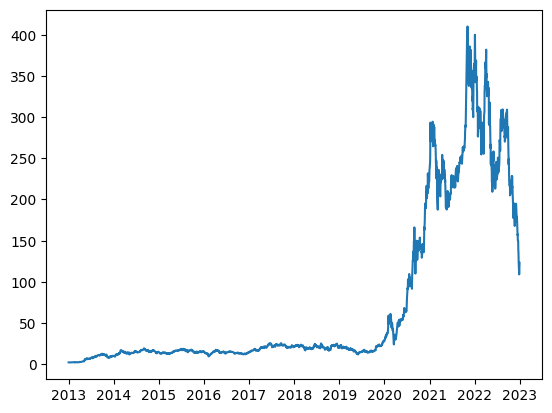

In [ ]:
df=df.drop(['Adj Close'],axis= 1)
df.head()
plt.plot(df.Date,df.Close)

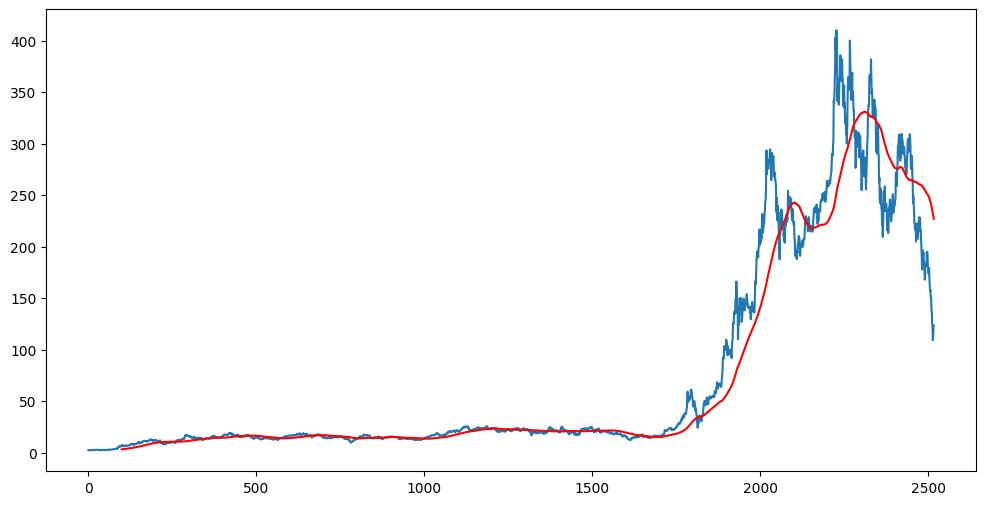

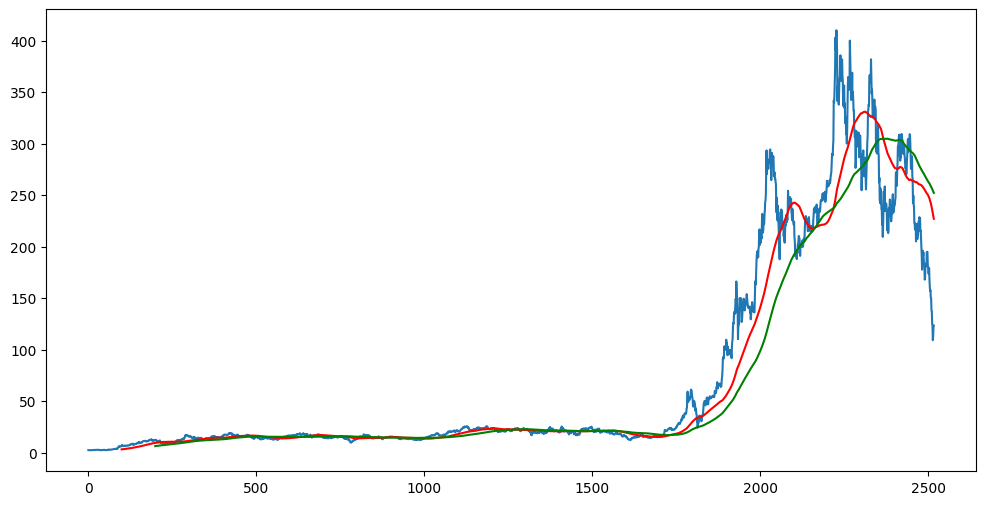

In [ ]:
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

plt.figure(figsize=(12,6))
plt.plot(df.Close)

plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
#Data here we will split as we made some graphs to address
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1662, 100, 1)

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - loss: 0.0082
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - loss: 0.0068
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - loss: 0.0081
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - loss: 0.0073
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 0.0066


In [ ]:
model.save('keras_model.h5')  # As Model Here is trained by these around 50 epoch

In [ ]:
data_testing.head()

Ticker,TSLA
1762,28.684000
1763,29.534000
1764,30.102667
1765,31.270666
1766,32.809334


In [ ]:
data_training.tail(100)

Ticker,TSLA
1662,15.667333
1663,15.267333
1664,15.666667
1665,14.641333
1666,14.376000
...,...
1757,28.350000
1758,28.729334
1759,28.691999
1760,27.646667


In [ ]:
past_100_days=data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

Ticker,TSLA
0,15.667333
1,15.267333
2,15.666667
3,14.641333
4,14.376000


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[3.97598427e-03],
       [2.96556954e-03],
       [3.97430278e-03],
       [1.38426795e-03],
       [7.14028340e-04],
       [1.43816010e-03],
       [2.59845194e-03],
       [2.43510120e-03],
       [1.58803721e-03],
       [1.81032941e-03],
       [0.00000000e+00],
       [6.06248841e-04],
       [4.51320027e-04],
       [7.05608819e-04],
       [1.73623281e-03],
       [2.39300119e-03],
       [2.29195971e-03],
       [1.56277624e-03],
       [3.06155930e-03],
       [2.70286122e-03],
       [3.43373101e-03],
       [4.06524082e-03],
       [6.01197370e-03],
       [5.80483663e-03],
       [5.69200782e-03],
       [5.28952343e-03],
       [5.62296053e-03],
       [5.40404336e-03],
       [5.92777367e-03],
       [4.92072193e-03],
       [5.02345212e-03],
       [1.98883529e-03],
       [2.91336610e-03],
       [5.24742823e-03],
       [5.17501313e-03],
       [4.96282676e-03],
       [5.60612631e-03],
       [5.34341799e-03],
       [3.64254717e-03],
       [3.37310565e-03],


In [ ]:
input_data.shape

(856, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [ ]:
y_pred = model.predict(x_test)
tolerance = 0.1
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance)*3.48
print(f"Accuracy: {accuracy * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Accuracy: 90.29%


In [ ]:
#Predixtions starts here
y_predicted=model.predict(x_test)
y_predicted.shape
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor=1/0.05953089
y_predicted=y_predicted*scale_factor
y_test*=scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()